In [1]:
from pycocotools.coco import COCO
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
annFile = "cheetah_run_mask_coco.json"
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print(f"COCO categories: \n{' '.join(nms)}\n")

nms = set([cat['supercategory'] for cat in cats])
print(f"COCO supercategories: \n{' '.join(nms)}\n")

COCO categories: 
Bird Human Cup (object) Unknown (object)

COCO supercategories: 
type



In [4]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=["Unknown (object)"]);
imgIds = coco.getImgIds(catIds=catIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

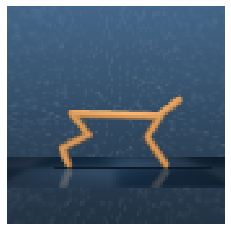

In [5]:
# load and display image
I = cv2.imread(img["file_name"])
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(I)
plt.show()

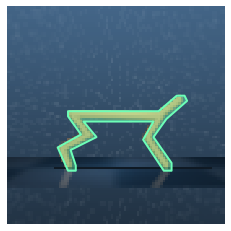

In [6]:
# load and display instance annotations
plt.axis('off')
plt.imshow(I)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

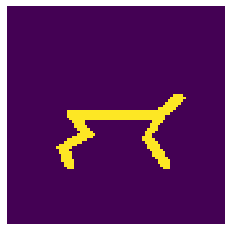

In [7]:
# show mask only
mask = coco.annToMask(anns[0])
plt.axis('off')
plt.imshow(mask) 

In [8]:
def annToMask(coco_json_file, image_id, ann_id=0):
    coco = COCO(coco_json_file)
    cats = coco.loadCats(coco.getCatIds())
    # get all catagory ids in the coco json file
    catIds = [cat["id"] for cat in cats]
    # get ann ids for image_id with all catagory ids
    annIds = coco.getAnnIds(imgIds=[image_id], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    assert ann_id < len(anns)
    mask = coco.annToMask(anns[ann_id])
    return mask


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


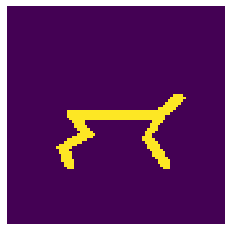

In [9]:
mask = annToMask("cheetah_run_mask_coco.json", image_id=3)
plt.axis('off')
plt.imshow(mask)